In [1]:
from pattern_regression import *

# Load
pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, result_df, rchange_df = parseRawInput(patterns_csv, ref_key)
model_file = '../dpgmm_alpha15.58_bilateral_model.pkl'
best_model = cPickle.load(open(model_file, 'rb'))
alpha = best_model.alpha
result_df = loadResults(alpha, master_csv)

# generate conversion data
big_groups = bigGroups(result_df, threshold=3)
small_groups = smallGroups(result_df, threshold=50)
medium_groups = list(set(big_groups) & set(small_groups))
conversions = parseConversions(big_groups, result_df, threshold, master_keys)
conversions.to_csv('%s_conversions.csv' % generateFileRoot(alpha))
positive_patterns = list(conversions[conversions['pos-pos']>=0.8].index)
negative_patterns = list(conversions[conversions['neg-neg']>=0.9].index)
transition_patterns = list(set(conversions.index) - (set(positive_patterns) | set(negative_patterns)))
groups = {'positive': positive_patterns, 'negative': negative_patterns, 'transition': transition_patterns}
uptake_members, pattern_members, change_members, prior_members = mergeResults(result_df, pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, rchange_df)

# create giant dataframe of merged results
uptake_tp, pattern_tp, change_tp, prior_tp = mergeResults(result_df, pattern_prior_df, pattern_post_df, uptake_prior_df, uptake_post_df, rchange_df, with_timepoint=True)
merged_members = prior_tp.copy().reset_index()
merged_members = merged_members.merge(uptake_tp[pattern_keys].reset_index(), on=['rid','timepoint'], how='outer')
merged_members = merged_members.merge(change_tp[change_keys].reset_index(), on=['rid','timepoint'], how='outer')
all_keys = master_keys+summary_keys+pattern_keys+change_keys

15.5760126963
15.5760126963


pattern_regression.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  uptake_prior_df.dropna(inplace=True)
pattern_regression.py:322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  uptake_post_df.dropna(inplace=True)


In [2]:
matplotlib inline

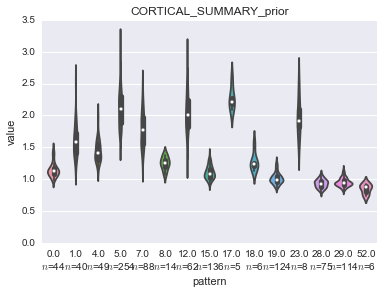

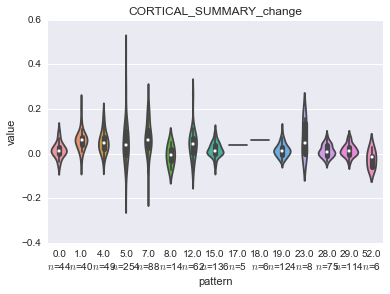

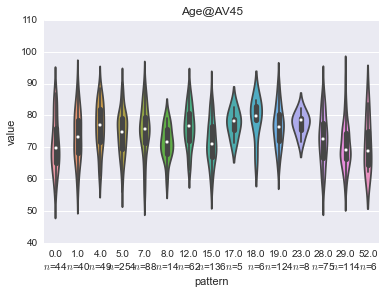

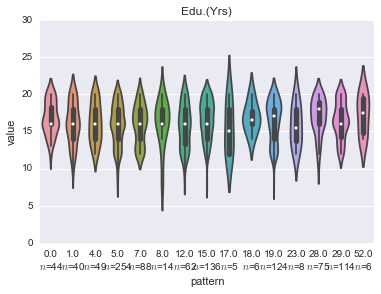

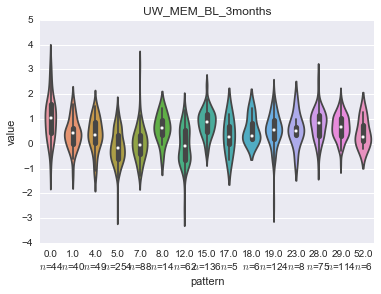

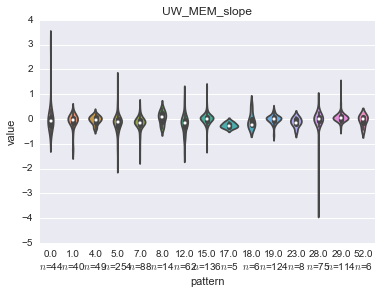

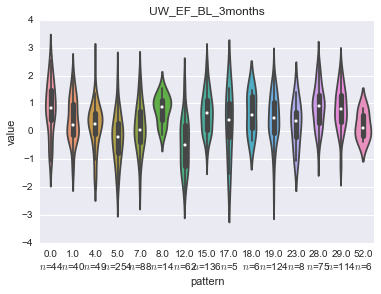

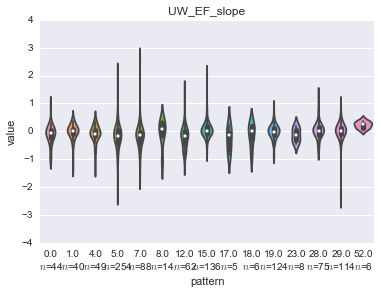

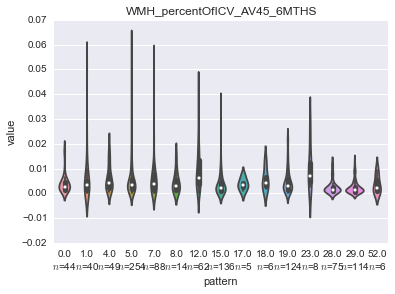

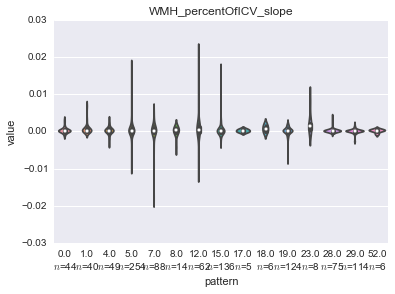

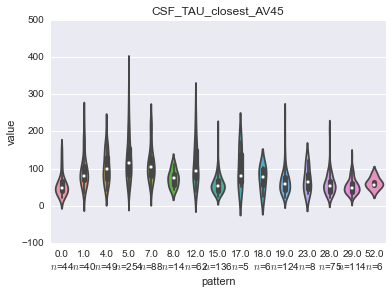

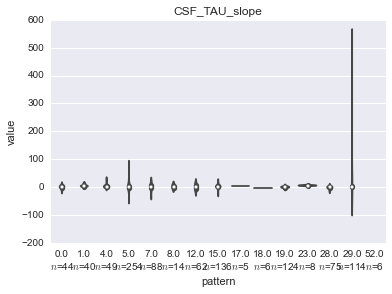

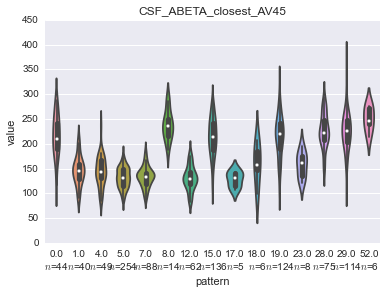

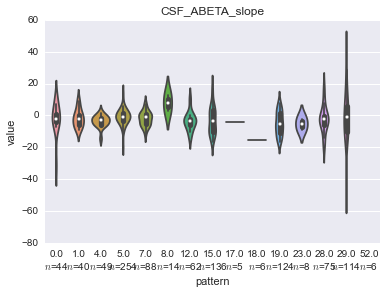

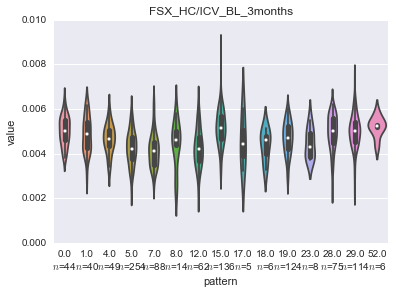

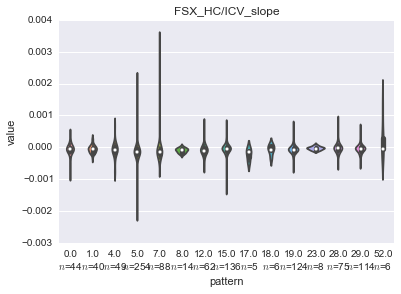

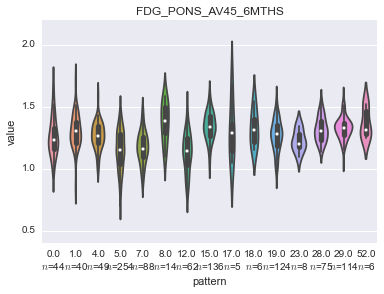

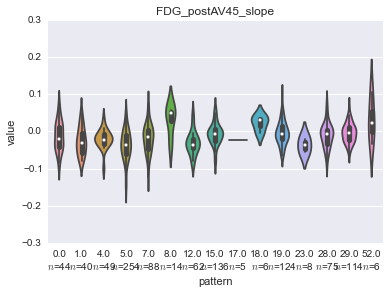

In [5]:
boxplot_keys = ['CORTICAL_SUMMARY_prior', 'CORTICAL_SUMMARY_change']
boxplot_keys += [k for k in master_keys if k not in cat_keys]
for k in boxplot_keys:
    plotValueBox(result_df, big_groups, k, save=False)